<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/ML_hardcoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

# 다중 회귀 데이터 전처리 함수
def poly_feature(data, degree, include_bias=False):
  # degree parameter : 데이터 차수 결정
  return PolynomialFeatures(degree=degree, include_bias=include_bias).fit_transform(data)

In [0]:
X = np.random.randn(200,1)
y = 1.5*X+ np.random.randn(200,1) + 3

In [0]:
# 정규방정식 

X_bias = np.c_[np.ones((200,1)),X] # bias 출력 추가
# bias 추가 함수
def bias(data):
  return np.c_[np.ones((len(data),1)),data]

theta_hat = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [4]:
theta_hat

array([[2.96403596],
       [1.49287008]])

In [0]:
#데이터 그래프 함수
def graph(X,y,theta_hat,poly=0):
  plt.plot(X,y,'b.')
  X_new = np.linspace(min(X),max(X),len(X)).reshape(len(X),1)
  if poly:
    X_new_poly = poly_feature(X_new, poly)
    y_new = bias(X_new_poly).dot(theta_hat)
  else:
    y_new = bias(X_new).dot(theta_hat)
  plt.plot(X_new,y_new,'r-',label='predict')
  plt.xlabel('X',fontsize=12)
  plt.ylabel('y',fontsize=12)
  plt.legend(loc='upper left',fontsize=10)
  plt.axis([min(X),max(X),min(y),max(y)])
  plt.show()

In [0]:
y_predict = X_bias.dot(theta_hat)

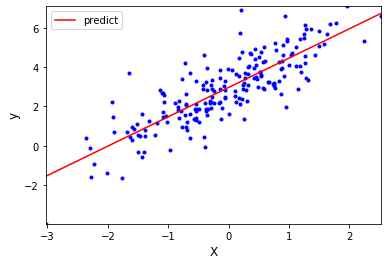

In [10]:
graph(X,y,theta_hat)

In [0]:
#MSE 그래디언트 벡터
def gradient_MSE(X,y,theta):
  return 2/len(X)*(X.T.dot(X.dot(theta)-y))

#배치 경사 하강
def batch_gradient_descent(X,y,eta,iteration): 
  #eta: 학습률, iteration: 반복 횟수
  theta = np.random.randn(np.shape(X)[1],1)
  for i in range(iteration):
    theta = theta - eta*gradient_MSE(X,y,theta)
  return theta

In [12]:
batch_gradient_descent(X_bias,y,0.1,100)

array([[2.96403596],
       [1.49287008]])

In [0]:
# 확률적 경사 하강
def stochastic_gradient_descent(X,y,eta,ls_func,iteration):
   #ls_func: 학습 스케줄 함수
   theta = np.random.randn(2,1)
   for i in range(iteration):
     random_index = np.random.randint(len(X))
     X_random_sample = X[random_index:random_index+1]
     y_random_sample = y[random_index:random_index+1]
     eta = ls_func(i+1)
     theta = theta - eta*gradient_MSE(X_random_sample,y_random_sample,theta)
   return theta
   

In [14]:
# learning schedule 함수
def learning_schedule(aug):
  return 5/(50+aug)

#SGDRegressor invscaling learning schedule 함수
def invscaling(aug,eta0=0.01, power_t=0.25):
  return eta0/((aug)**power_t)

#SGDRegressor optimal learning schedule 함수
def optimal(aug,t0=1,alpha=0.1):
  z = t0 + aug
  return 1/(alpha*z)

stochastic_gradient_descent(X_bias,y,0.1,learning_schedule,1000)

array([[2.99039223],
       [1.428987  ]])

In [15]:
stochastic_gradient_descent(X_bias,y,0.1,invscaling,1000)

array([[2.95891428],
       [1.43304756]])

In [16]:
stochastic_gradient_descent(X_bias,y,0.1,optimal,1000)

array([[3.09146392],
       [1.34307947]])

In [0]:
#미니배치 경사 하강
def Mbatch_gradient_descent(X,y,size=5,eta=0.1,iteration=100):
  # size = 배치 샘플 사이즈
  theta = np.random.randn(2,1)
  for i in range(iteration):
    random_index = np.random.randint(len(X))
    X_sample = X[random_index:random_index+size+1]
    y_sample = y[random_index:random_index+size+1]
    theta = theta - eta*gradient_MSE(X_sample,y_sample,theta)
  return theta

In [18]:
Mbatch_gradient_descent(X_bias,y,10,0.1,1000)

array([[2.76723131],
       [1.55789563]])

In [0]:
# 3차원 데이터 생성
X = 3*np.random.rand(50,1) - 2
y = 0.5*X**3 + 1*X**2 + 2*X + 3 + np.random.randn(50,1)*2

In [0]:
X_poly = poly_feature(X,3)
X_poly_bias = bias(X_poly)

In [0]:
# 배치 경사 하강으로 다중 회귀
theta_hat = batch_gradient_descent(X_poly_bias,y,0.1,1000)

In [0]:
theta_hat

array([[3.72979563],
       [2.16688147],
       [0.8397724 ],
       [0.47641919]])

In [0]:
# 10차 다중 회귀

# 여러가지 방법으로 데이터 스케일링 해보기

X_poly_10 = poly_feature(X,10)/100
y_10 = y/100
X_poly_bias_10 = bias(X_poly_10)

theta_hat = batch_gradient_descent(X_poly_bias_10,y_10,0.1,1000)

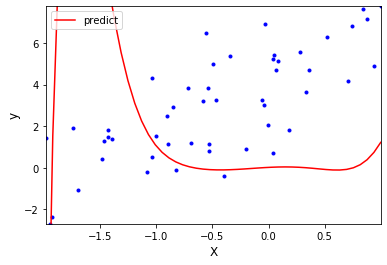

In [0]:
graph(X,y,theta_hat,poly=10)

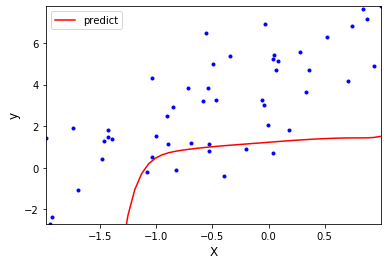

In [0]:
X_poly_10 = np.arctan(poly_feature(X,10))
y_10 = np.arctan(y)
X_poly_bias_10 = bias(X_poly_10)

theta_hat = batch_gradient_descent(X_poly_bias_10,y_10,0.1,1000)
graph(X,y,theta_hat,poly=10)

In [0]:
# 릿지 회귀 Ridge Regression

def Ridge_Regression(X,y,eta = 0.01,alpha=0.1,solver='Normal',iteration=1000):
  A = np.eye(np.shape(X)[1]);A[0][0]=0 # bias 제외

  # 릿지 회귀 정규방정식

  if solver == 'Normal':
    theta_hat = np.linalg.inv(X.T.dot(X)+alpha*A).dot(X.T).dot(y)
   
    """ 
    숄레스키 분해를 이용한 릿지 회귀
    릿지 회귀는 어떤 행렬 A 가 대칭이고 양의 정부호 행렬일 경우 하삼각행렬 L의
    L L^T 로 분해될 수 있음을 이용하며 성능 면에서 우위를 점함
    """
    
  elif solver == 'cholesky':
    L = np.linalg.cholesky(X.T.dot(X)+ alpha*A)
    theta_hat = np.linalg.solve(L.dot(L.T),X.T.dot(y))
  

  
  # 릿지 회귀 경사 하강 모델
  elif solver == 'regression':
    theta = np.random.randn(np.shape(X)[1],1)
    for i in range(iteration):
      theta = theta - eta*(gradient_MSE(X,y,theta)+alpha*A.dot(theta))
    return theta

  return theta_hat



In [23]:
# 릿지 회귀 정규방정식
theta_hat = Ridge_Regression(X_poly_bias,y) 
print(theta_hat)

[[2.41642036]
 [2.90016532]
 [1.30232874]
 [0.16245775]]


In [0]:
#릿지 회귀 숄레스키 분해
theta_hat = Ridge_Regression(X_poly_bias,y,alpha=0,solver='regression')

#alpha = 1
theta_hat_1 = Ridge_Regression(X_poly_bias,y,alpha=1,solver='regression')

#alpha = 10
theta_hat_10 = Ridge_Regression(X_poly_bias,y,alpha=10,solver='regression')

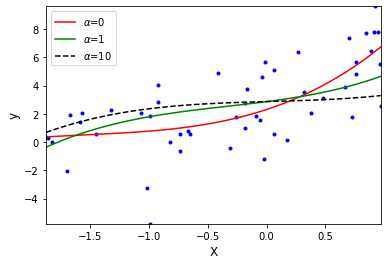

In [26]:
plt.plot(X,y,'b.')
X_new = np.linspace(min(X),max(X),len(X)).reshape(len(X),1)
X_new_poly = poly_feature(X_new, 3)
y_new = bias(X_new_poly).dot(theta_hat)
y_new_1 = bias(X_new_poly).dot(theta_hat_1)
y_new_10 = bias(X_new_poly).dot(theta_hat_10)
plt.plot(X_new,y_new,'r-',label=r'$\alpha$=0')
plt.plot(X_new,y_new_1,'g-',label=r'$\alpha$=1')
plt.plot(X_new,y_new_10,'k--',label=r'$\alpha$=10')
plt.xlabel('X',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.legend(loc='upper left',fontsize=10)
plt.axis([min(X),max(X),min(y),max(y)])
plt.show()

In [0]:
# 라쏘 회귀

"""
라쏘 회귀는 규제항으로 가중치 벡터의 l1 노름을 사용하며 릿지 회귀에 비해 
덜 중요한 특성의 가중치를 완전히 배제하려는 경향이 있다.
"""

def lasso_regression(X,y,eta = 0.01, alpha=0.1,iteration=1000):
  theta = np.random.randn(np.shape(X)[1],1)
  for i in range(iteration):

    # 서브그래디언트 벡터 추출
    sub_gradient = []
    for i in range(len(theta)):
      if theta[i] == 0:
        sub_gradient.append(0)
      elif theta[i] > 0:
        sub_gradient.append(1)
      else:
        sub_gradient.append(-1)
    sub_gradient = np.array(sub_gradient).reshape(len(theta),1)

      
    theta = theta - eta*(gradient_MSE(X,y,theta) + alpha*sub_gradient)

  return theta


In [0]:
theta_hat = lasso_regression(X_poly_bias,y)

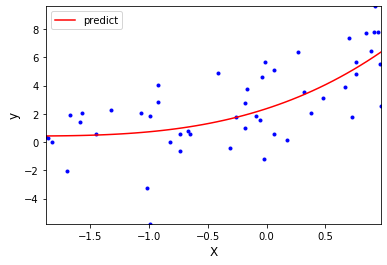

In [31]:
graph(X,y,theta_hat,poly=3)

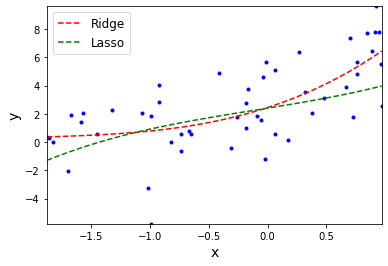

In [34]:
# 릿지 라쏘 비교

theta_ridge = Ridge_Regression(X_poly_bias,y,eta = 0.1,alpha=1,solver='cholesky')
theta_lasso = lasso_regression(X_poly_bias,y,eta=0.1,alpha=1)

plt.plot(X,y,'b.')
X_ = np.linspace(min(X),max(X),len(X)).reshape(len(X),1)
X_new = poly_feature(X_,3)
X_new_bias = bias(X_new)
ridge_pred = X_new_bias.dot(theta_ridge)
lasso_pred = X_new_bias.dot(theta_lasso)
plt.plot(X_, ridge_pred, 'r--',label='Ridge')
plt.plot(X_, lasso_pred, 'g--',label='Lasso')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.legend(loc='upper left',fontsize=12)
plt.axis([min(X),max(X),min(y),max(y)])
plt.show()

In [0]:
iris = datasets.load_iris()

In [0]:
X = iris['data']
y = np.array([(iris['target']==1).astype(np.int)])
X_train = X[:120]
y_train = y.T[:120].T
X_test = X[120:]
y_test = y.T[120:].T

In [37]:
np.shape(y_train)

(1, 120)

In [0]:
# 로지스틱 회귀

def logistic(X,y,eta=0.01,iteration=1000):
  theta = np.random.randn(np.shape(X)[1],1)
  for i in range(iteration):
    # 확률 추정 벡터
    p_hat = 1/(1+np.exp(-1*theta.T.dot(X.T)))

    # 비용 함수: log loss
    cost = -1*(np.log(p_hat).dot(y.T) + np.log(1-p_hat).dot(1-y.T))/len(X)

    """
    로지스틱 회귀는 최솟값을 구하는 정규방정식 등의 명확한 해가 알려져 있지 않지만
    비용함수가 볼록 함수이기에 경사 하강법으로 전역 최솟값을 찾는 것이 보장되어 있다.
    
    *비용함수의 그래디언트는 http://chana.tistory.com/22 에 표시하여 놓았으며 
    다음 수식은 행렬계산을 이용하여 sum 을 대신한 연산입니다.
    """

    gradient_cost = (1/(1+np.exp(-1*theta.T.dot(X.T))) - y).dot(X)/len(X)
    theta = theta - eta*gradient_cost.T
    '''
    비용 체크 
    if i%500 == 0:
      print('cost: ',cost)
    '''
  return theta




In [0]:
theta = logistic(X_train,y_train,eta = 0.01,iteration=3000)

In [67]:
y_pred = X_test.dot(theta)
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])):
    if -1* y_pred[i][j] >= 0.5:
      y_pred[i][j] = 1
    else:
      y_pred[i][j] = 0
accuracy = np.mean(y_pred == y_test)
print(accuracy*100,'%')

100.0 %


In [0]:
# 소프트맥스 회귀 softmax regression

def softmax_regression(X,y,class_num,eta=0.01,alpha=0.01,iteration=1000,penalty='None'):
  # parameter matrix
  param_mtx = np.random.randn(class_num,np.shape(X)[1])

  # 원핫 인코딩
  y_ = np.zeros((len(y),class_num))
  y_[np.arange(len(y)),y] = 1
  y = y_.T

  best_cost = np.infty




  for i in range(iteration):
    cls_score = param_mtx.dot(X.T)
    cls_sum = np.exp(cls_score).sum(axis=0)
    
    
  # 소프트맥스 정규화
    # 반복문 이용한 전체 데이터의 확률 점수
    arr_ = []
    for cls in range(class_num):
      arr_.append(cls_sum)
    arr_ = np.array(arr_)
    p_hat = np.exp(cls_score)/ arr_

    # 크로스 엔트로피 비용 함수
    cost = -1*np.sum(y * np.log(p_hat))/len(X)

    #cross-entropy cost function gradient 크로스엔트로피 그래디언트 벡터
    cross_gradient = (p_hat - y).dot(X)/len(X)

    #L1 규제
    if penalty == 'l1':
      param_mtx_ = np.r_[np.zeros([1,np.shape(X)[1],]),param_mtx[1:]]
      l1_loss = alpha*np.sum(np.square(param_mtx_))
      cost = cost + l1_loss
      sub_gradient = []
      for i in range(len(param_mtx_)):
        if theta[i] == 0:
          sub_gradient.append(0)
        elif theta[i] > 0:
          sub_gradient.append(1)
        else:
          sub_gradient.append(-1)
      sub_gradient = np.array(sub_gradient).reshape(len(param_mtx_),1)

      cross_gradient += alpha * sub_gradient

    #L2 규제
    elif penalty == 'l2':
      l2_loss = 1/2 * alpha*np.sum(np.square(param_mtx[1:]))
      cost = cost+l2_loss
      cross_gradient += np.r_[np.zeros([1,np.shape(X)[1]]),alpha*param_mtx[1:]]


    param_mtx = param_mtx - eta*cross_gradient



    if i%500 == 0:
      print(i ,cost)
    
    # 조기 종료
    if cost < best_cost:
      best_cost = cost
    else:
      print(i , best_cost, 'ealry stopped')
      break

  return param_mtx

In [0]:
X = bias(iris['data'])
y = iris['target']


#데이터 섞기

index = np.arange(X.shape[0])
np.random.shuffle(index)
X = X[index]
y = y.T[index].T

X_train = X[:120]
y_train = y.T[:120].T
X_test = X[120:]
y_test = y.T[120:].T

In [162]:
#l2 규제
param = softmax_regression(X_train,y_train,3,iteration=5000,penalty='l2')

0 5.615393898417718
500 0.5353706982455286
1000 0.44285906070985603
1500 0.3926957341203646
2000 0.3591568346781004
2500 0.3349375510654445
3000 0.31660723808048286
3500 0.3022476141120581
4000 0.2906892037100882
4500 0.28117811378998


In [0]:
def accuracy(X_test,y_test,theta):
  y_proba = X_test.dot(theta.T)
  y_pred = np.argmax(y_proba, axis=1)
  accuracy = np.mean(y_pred == y_test)
  return accuracy

In [164]:
accuracy(X_test, y_test, param)

0.9333333333333333

In [157]:
#l1 규제
param = softmax_regression(X_train,y_train,3,iteration=5000,penalty='l1')

2 0.3406011016226366 ealry stopped


In [160]:
accuracy(X_test, y_test, param)

0.9666666666666667